In [160]:
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [161]:
#carregagar os dados no csv
dados = pd.read_csv('C:\\Users\\bruno\\IA\\data consolidada\\water_potability.csv')

In [162]:
dados

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [163]:
dados.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [164]:
dados.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [165]:
#deletar colunas
dados2 = dados.drop(columns=['ph','Sulfate'])

In [166]:
#preencher dados com mediana
dados2 = dados2.fillna(dados.mean())

In [167]:
#verificar se está com dados faltantes
dados2.isna().sum()

Hardness           0
Solids             0
Chloramines        0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [168]:
dados2.Potability

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64

In [169]:
dados2

,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,204.890455,20791.318981,7.300212,564.308654,10.379783,86.990970,2.963135,0
1,129.422921,18630.057858,6.635246,592.885359,15.180013,56.329076,4.500656,0
2,224.236259,19909.541732,9.275884,418.606213,16.868637,66.420093,3.055934,0
3,214.373394,22018.417441,8.059332,363.266516,18.436524,100.341674,4.628771,0
4,181.101509,17978.986339,6.546600,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...
3271,193.681735,47580.991603,7.166639,526.424171,13.894419,66.687695,4.435821,1
3272,193.553212,17329.802160,8.061362,392.449580,19.903225,66.396293,2.798243,1
3273,175.762646,33155.578218,7.350233,432.044783,11.039070,69.845400,3.298875,1
3274,230.603758,11983.869376,6.303357,402.883113,11.168946,77.488213,4.708658,1


In [170]:
dados2.iloc[:,:7]

,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,204.890455,20791.318981,7.300212,564.308654,10.379783,86.990970,2.963135
1,129.422921,18630.057858,6.635246,592.885359,15.180013,56.329076,4.500656
2,224.236259,19909.541732,9.275884,418.606213,16.868637,66.420093,3.055934
3,214.373394,22018.417441,8.059332,363.266516,18.436524,100.341674,4.628771
4,181.101509,17978.986339,6.546600,398.410813,11.558279,31.997993,4.075075
...,...,...,...,...,...,...,...
3271,193.681735,47580.991603,7.166639,526.424171,13.894419,66.687695,4.435821
3272,193.553212,17329.802160,8.061362,392.449580,19.903225,66.396293,2.798243
3273,175.762646,33155.578218,7.350233,432.044783,11.039070,69.845400,3.298875
3274,230.603758,11983.869376,6.303357,402.883113,11.168946,77.488213,4.708658


In [171]:
clf = svm.SVC(gamma=0.001, C=100.0)

In [172]:
y = dados2['Potability']
x = dados2.drop(columns='Potability')

#x = pd.DataFrame(dados2.iloc[:,:7])
#y = pd.DataFrame(dados2.Potability)

In [173]:
x

,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,204.890455,20791.318981,7.300212,564.308654,10.379783,86.990970,2.963135
1,129.422921,18630.057858,6.635246,592.885359,15.180013,56.329076,4.500656
2,224.236259,19909.541732,9.275884,418.606213,16.868637,66.420093,3.055934
3,214.373394,22018.417441,8.059332,363.266516,18.436524,100.341674,4.628771
4,181.101509,17978.986339,6.546600,398.410813,11.558279,31.997993,4.075075
...,...,...,...,...,...,...,...
3271,193.681735,47580.991603,7.166639,526.424171,13.894419,66.687695,4.435821
3272,193.553212,17329.802160,8.061362,392.449580,19.903225,66.396293,2.798243
3273,175.762646,33155.578218,7.350233,432.044783,11.039070,69.845400,3.298875
3274,230.603758,11983.869376,6.303357,402.883113,11.168946,77.488213,4.708658


In [174]:
y

,Potability
0,0
1,0
2,0
3,0
4,0
...,...
3271,1
3272,1
3273,1
3274,1


<AxesSubplot:>

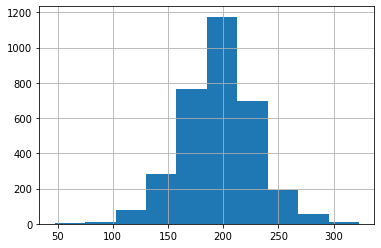

In [175]:
x['Hardness'].hist()

array([[<AxesSubplot:title={'center':'Potability'}>]], dtype=object)

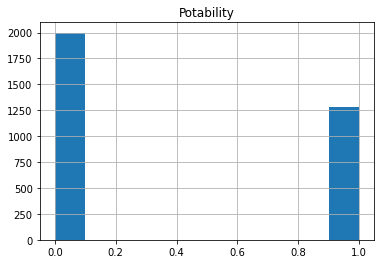

In [176]:
y.hist()

In [ ]:
#--------------------------------------------------

In [182]:
y['Potability'].unique()

array([0, 1], dtype=int64)

In [189]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [155]:
clf.fit(x,y)

c:\users\bruno\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(C=100.0, gamma=0.001)

In [159]:
saida = clf.predict(x)

In [157]:
saida

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [ ]:
#----------------------------------------------

In [177]:
from sklearn.neighbors import KNeighborsClassifier

In [178]:
knn = KNeighborsClassifier(n_neighbors=1)

In [179]:
knn.fit(x,y)

c:\users\bruno\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

In [180]:
KNeighborsClassifier(n_neighbors=1)

KNeighborsClassifier(n_neighbors=1)

In [181]:
knn.predict(x)

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [ ]:
#---------------------------------------